CABra dataset - **Climate attributes**
 
clim_p, clim_tmin, clim_tmax, clim_rh, clim_wind, and clim_srad are the long-term mean precipiation, minimum and maximum temperature, relative humidity, wind speed, and solar radiation in the catchment.
clim_et and clim_pet are the long-term mean actual and potential evapotranspiration in the catchment. clim_pet was calculated with Priestley & Taylor method.
aridity_index and p_seasonality are the aridity index and seasonality of precipitation in the catchment.
clim_quality is the quality of climate data based on data source: 1 = REF climatology; 2 = ENS climatology.

CABra dataset - **Streamflow attributes**

q is the daily streamflow. 
q_mean, q_1, q_5, q_95, and q_99 are long-term mean of q, 1st quantile of q (very-low flow), 5th quantile of q (low flow), 95th quantile of q (hig-flow), and 99th quantile of q (very-high flow), respectively.
q_lf, q_ld, q_hf, and q_hd are the frequency and duration of low flow and high flow events, respectively. q_zero is the frequency of zero flow. q_hfd is the half-flow day.
q_cv, q_lcv, and q_hcv are the coefficient of variation of mean flow, low flow, and high flow, respectively.
q_elasticity, fdc_slope, baseflow_index, and runoff_coef are the streamflow elasticity, slope of the flow duration curve, the baseflow index, and the runoff coefficient of the catchment, respectively.
 

In [1]:
import pandas as pd
import pathlib
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

In [23]:
import geopandas as gpd

In [2]:
df_climate = pd.read_csv('CABra_climate_attributes.csv', skiprows=[1])
df_streamflow = pd.read_csv('CABra_streamflow_attributes.csv', skiprows=[1])

In [3]:
# df_inventario = pd.read_csv('Inventario.csv')

In [4]:
# df_inventario.columns

In [5]:
# df_inventario.drop_duplicates(subset=['Codigo'], inplace=True)

In [6]:
df_climate.head()

,CABra ID,ANA ID,clim_p,clim_tmin,clim_tmax,clim_rh,clim_wind,clim_srad,clim_et,clim_pet,aridity_index,p_seasonality,clim_quality
0,1,13880000,5.64,21.61,30.48,83.17,0.82,16.42,3.87,5.04,0.89,0.46,2
1,2,14110000,8.88,21.83,28.60,86.41,0.42,16.24,4.29,4.96,0.56,-0.28,2
2,3,14230000,8.52,22.18,29.67,85.71,0.60,15.60,4.28,4.81,0.56,-0.27,2
3,4,14250000,8.86,22.00,29.13,86.26,0.49,15.99,4.29,4.90,0.55,-0.26,2
4,5,14260000,7.79,21.91,28.80,85.44,0.67,16.14,4.21,4.94,0.63,-0.27,2


In [7]:
df_climate.columns

Index(['CABra ID', 'ANA ID', 'clim_p', 'clim_tmin', 'clim_tmax', 'clim_rh',
       'clim_wind', 'clim_srad', 'clim_et', 'clim_pet', 'aridity_index',
       'p_seasonality', 'clim_quality'],
      dtype='object')

In [8]:
df_streamflow.head()

,CABra ID,ANA ID,q_mean,q_1,q_5,q_95,q_99,q_lf,q_ld,q_hf,q_hd,q_hfd,q_zero,q_cv,q_lcv,q_hcv,q_elasticity,fdc_slope,baseflow_index,runoff_coef
0,1,13880000,2.25,0.34,0.39,4.52,4.64,19,38,0,0,181,0,0.08,0.11,0.04,0.36,-4.42,93.22,0.40
1,2,14110000,5.60,0.67,1.16,11.17,11.96,15,20,0,0,248,0,0.11,0.62,0.11,0.97,-1.93,90.46,0.63
2,3,14230000,6.69,1.24,2.12,12.42,14.16,4,9,0,0,238,0,0.08,0.46,0.09,1.08,-1.58,88.67,0.79
3,4,14250000,5.72,1.03,1.72,10.63,11.77,4,9,0,0,242,0,0.10,0.50,0.10,0.89,-1.68,91.42,0.65
4,5,14260000,5.06,0.43,1.09,9.91,11.83,14,14,0,0,243,0,0.09,0.55,0.13,0.55,-1.79,88.12,0.65


In [9]:
df_streamflow.columns

Index(['CABra ID', 'ANA ID', 'q_mean', 'q_1', 'q_5', 'q_95', 'q_99', 'q_lf',
       'q_ld', 'q_hf', 'q_hd', 'q_hfd', 'q_zero', 'q_cv', 'q_lcv', 'q_hcv',
       'q_elasticity', 'fdc_slope', 'baseflow_index', 'runoff_coef'],
      dtype='object')

In [10]:
variables = ['aridity_index', 'baseflow_index', 'p_seasonality']

In [11]:
df = pd.merge(left=df_climate, right=df_streamflow, on='CABra ID')

In [12]:
df.head()

,CABra ID,ANA ID_x,clim_p,clim_tmin,clim_tmax,clim_rh,clim_wind,clim_srad,clim_et,clim_pet,...,q_hd,q_hfd,q_zero,q_cv,q_lcv,q_hcv,q_elasticity,fdc_slope,baseflow_index,runoff_coef
0,1,13880000,5.64,21.61,30.48,83.17,0.82,16.42,3.87,5.04,...,0,181,0,0.08,0.11,0.04,0.36,-4.42,93.22,0.40
1,2,14110000,8.88,21.83,28.60,86.41,0.42,16.24,4.29,4.96,...,0,248,0,0.11,0.62,0.11,0.97,-1.93,90.46,0.63
2,3,14230000,8.52,22.18,29.67,85.71,0.60,15.60,4.28,4.81,...,0,238,0,0.08,0.46,0.09,1.08,-1.58,88.67,0.79
3,4,14250000,8.86,22.00,29.13,86.26,0.49,15.99,4.29,4.90,...,0,242,0,0.10,0.50,0.10,0.89,-1.68,91.42,0.65
4,5,14260000,7.79,21.91,28.80,85.44,0.67,16.14,4.21,4.94,...,0,243,0,0.09,0.55,0.13,0.55,-1.79,88.12,0.65


In [13]:
# df = pd.merge(left=df, right=df_inventario[['Codigo', 'AreaDrenagem']], left_on='ANA ID_x', right_on='Codigo')

In [14]:
# df.loc[df['AreaDrenagem'].isnull()]

In [15]:
df['ECI'] = np.log(df['q_mean']/(df['clim_p']-df['clim_et']))

C:\Users\User\anaconda3\envs\Teste_ML\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [16]:
df['Aeff/Atopo'] = df['q_mean']/(df['clim_p']-df['clim_et'])

In [17]:
df[['Aeff/Atopo','ECI']].describe()

,Aeff/Atopo,ECI
count,735.000000,734.000000
mean,1.033062,-0.057251
std,0.472764,0.461552
min,-1.500000,-2.277267
25%,0.812509,-0.205516
50%,1.006250,0.006505
75%,1.196199,0.179199
max,6.781955,1.914265


In [18]:
df.loc[df['Aeff/Atopo']>=2, 'substantial'] = 'gaining'
df.loc[(df['Aeff/Atopo']<2)&(df['Aeff/Atopo']>1), 'substantial'] = 'na'
df.loc[(df['Aeff/Atopo']>0.5)&(df['Aeff/Atopo']<=1), 'substantial'] = 'na'
df.loc[df['Aeff/Atopo']<=0.5, 'substantial'] = 'losing'

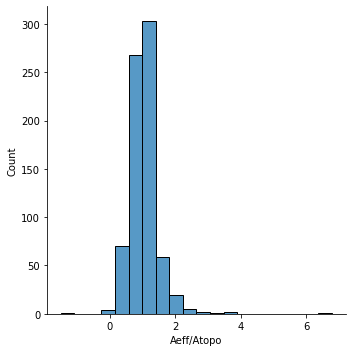

In [19]:
sns.displot(df, x='Aeff/Atopo', bins=20)

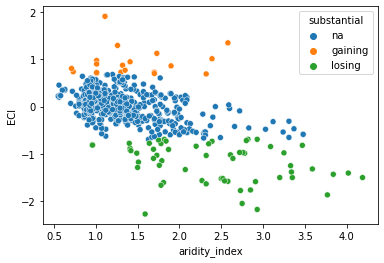

In [20]:
sns.scatterplot(x='aridity_index', y='ECI', hue='substantial',data=df)

In [21]:
sns.scatterplot(x='AreaDrenagem', y='ECI', hue='substantial', data=df)
plt.xlim((1e0,1e5))

ValueError: Could not interpret value `AreaDrenagem` for parameter `x`

In [ ]:
df.loc[df['ECI'].isnull(),['q_mean','clim_p','clim_et']]

In [ ]:
df.dropna(subset=variables+['ECI'], inplace=True)

In [ ]:
rfr = RandomForestClassifier(random_state=1)
rfr.fit(X=df[variables], y=df['substantial'])

In [ ]:
rfr.feature_importances_

In [ ]:
plt.scatter(df['clim_pet']/df['clim_p'], (df['clim_p']-df['q_mean'])/df['clim_p'])
plt.xlabel('PET/P')
plt.ylabel('(P-Q)/P')

In [ ]:
sns.scatterplot(x=df['clim_pet']/df['clim_p'], y=(df['clim_p']-df['q_mean'])/df['clim_p'], hue='substantial', data=df)